# Models

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.compat.v1.keras.optimizers import Adam
from tensorflow.compat.v1.ragged import RaggedTensorValue
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
x = df.drop("Yield", axis=1)
y = df[["Yield"]]

In [4]:
x.head()

,Year,Area,Production,red soil,mountain soil,alluvial soil,clayey soil,laterite soil,loamy soil,sandy soil,...,District_Solapur,District_Unnao,Crop_Maize,Crop_Rice,Crop_Sugarcane,Crop_Urad,Crop_Wheat,Season_Kharif,Season_Rabi,Season_Whole year
0,2012,45000,91900,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,2012,7500,4600,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,2012,6100,1100,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,2012,14700,24800,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,2012,38900,46100,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [5]:
u = x.copy()

In [6]:
x.columns

Index(['Year', 'Area', 'Production', 'red soil', 'mountain soil',
       'alluvial soil', 'clayey soil', 'laterite soil', 'loamy soil',
       'sandy soil', 'black soil', 'forest soil', 'Mean_Seasonal_Rainfall',
       'District_Ahmednagar', 'District_Ariyalur', 'District_Azamgarh',
       'District_Bahraich', 'District_Bankura', 'District_Bardhaman',
       'District_Beed', 'District_Birbhum', 'District_Coimbatore',
       'District_Coochbehar', 'District_Cuddalore', 'District_Darjeeling',
       'District_Deoria', 'District_Dharmapuri', 'District_Dhule',
       'District_Dinajpur uttar', 'District_Dindigul', 'District_Erode',
       'District_Gondia', 'District_Gorakhpur', 'District_Hardoi',
       'District_Hooghly', 'District_Jalpaiguri', 'District_Kanchipuram',
       'District_Karur', 'District_Kheri', 'District_Kolhapur',
       'District_Krishnagiri', 'District_Madurai', 'District_Maharajganj',
       'District_Mainpuri', 'District_Maldah', 'District_Medinipur west',
       'Di

In [7]:
y.head()

,Yield
0,2.042222
1,0.613333
2,0.180328
3,1.687075
4,1.185090


In [8]:
len(y)

734

In [9]:
std = StandardScaler()
x = std.fit_transform(x)
y = std.fit_transform(y)
x_scaled = std.fit_transform(x)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [11]:
# Initialize Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(x_train, y_train)

# Predict on test set
lr_preds = lr_model.predict(x_test)

# Evaluate
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_squared = r2_score(y_test, lr_preds)
print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Linear Regression MAE: {lr_mae}")
print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression R^2: {lr_squared}")

Linear Regression RMSE: 0.23422016694077186
Linear Regression MAE: 0.10591620970555297
Linear Regression MSE: 0.05485908660176304
Linear Regression R^2: 0.9329947051954584


In [12]:
# Initialize Random Forest model
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(x_train, y_train)

# Predict on test set
rf_preds = rf_model.predict(x_test)

# Evaluate
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_squared = r2_score(y_test, rf_preds)
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R^2: {rf_squared}")

C:\Users\vansi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest RMSE: 0.12872281738619143
Random Forest MAE: 0.03542238598303179
Random Forest MSE: 0.016569563715838787
Random Forest R^2: 0.9797618121201688


In [13]:
# Initialize XGBoost model
xgb_model = XGBRegressor()

# Train the model
xgb_model.fit(x_train, y_train)

# Predict on test set
xgb_preds = xgb_model.predict(x_test)

# Evaluate
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_squared = r2_score(y_test, xgb_preds)
print(f"XGBoost RMSE: {xgb_rmse}")
print(f"XGBoost MAE: {xgb_mae}")
print(f"XGBoost MSE: {xgb_mse}")
print(f"XGBoost R^2: {xgb_squared}")

XGBoost RMSE: 0.14952885286721027
XGBoost MAE: 0.034574893766597704
XGBoost MSE: 0.022358877839783818
XGBoost R^2: 0.9726907009584571


In [14]:
# Assuming you have reshaped your data for CNN
x_train_cnn = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_cnn = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Initialize CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train_cnn.shape[1], 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1))

# Compile the model
cnn_model.compile(optimizer='adam', loss='mse')

# Train the model
cnn_model.fit(x_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(x_test_cnn, y_test))

# Predict on test set
cnn_preds = cnn_model.predict(x_test_cnn).flatten()

# Evaluate
cnn_rmse = np.sqrt(mean_squared_error(y_test, cnn_preds))
cnn_mae = mean_absolute_error(y_test, cnn_preds)
cnn_mse = mean_squared_error(y_test, cnn_preds)
cnn_squared = r2_score(y_test, cnn_preds)
print(f"CNN RMSE: {cnn_rmse}")
print(f"CNN MAE: {cnn_mae}")
print(f"CNN MSE: {cnn_mse}")
print(f"CNN R^2: {cnn_squared}")



Epoch 1/10

19/19 [==============================] - 2s 20ms/step - loss: 0.5176 - val_loss: 0.1526
Epoch 2/10
19/19 [==============================] - 0s 9ms/step - loss: 0.1094 - val_loss: 0.0399
Epoch 3/10
19/19 [==============================] - 0s 9ms/step - loss: 0.0492 - val_loss: 0.0155
Epoch 4/10
19/19 [==============================] - 0s 10ms/step - loss: 0.0237 - val_loss: 0.0147
Epoch 5/10
19/19 [==============================] - 0s 10ms/step - loss: 0.0219 - val_loss: 0.0199
Epoch 6/10
19/19 [==============================] - 0s 9ms/step - loss: 0.0198 - val_loss: 0.0279
Epoch 7/10
19/19 [==============================] - 0s 10ms/step - loss: 0.0221 - val_loss: 0.0197
Epoch 8/10
19/19 [==============================] - 0s 10ms/step - loss: 0.0187 - val_loss: 0.0185
Epoch 9/10
19/19 [==============================] - 0s 10ms/step - loss: 0.0131 - val_loss: 0.0244
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
CNN RMSE: 0.18107687123470953
CNN MAE: 0.07226

In [15]:
# Initialize LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(x_train.shape[1], 1)))
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse')

# Train the model
lstm_model.fit(x_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(x_test_cnn, y_test))

# Predict on test set
lstm_preds = lstm_model.predict(x_test_cnn).flatten()

# Evaluate
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_preds))
lstm_mae = mean_absolute_error(y_test, lstm_preds)
lstm_mse = mean_squared_error(y_test, lstm_preds)
lstm_squared = r2_score(y_test, lstm_preds)
print(f"LSTM RMSE: {lstm_rmse}")
print(f"LSTM MAE: {lstm_mae}")
print(f"LSTM MSE: {lstm_mse}")
print(f"LSTM R^2: {lstm_squared}")

Epoch 1/10
19/19 [==============================] - 3s 66ms/step - loss: 0.9675 - val_loss: 0.7175
Epoch 2/10
19/19 [==============================] - 1s 41ms/step - loss: 0.8899 - val_loss: 0.6312
Epoch 3/10
19/19 [==============================] - 1s 47ms/step - loss: 1.9179 - val_loss: 0.6476
Epoch 4/10
19/19 [==============================] - 1s 42ms/step - loss: 0.8544 - val_loss: 0.6545
Epoch 5/10
19/19 [==============================] - 1s 40ms/step - loss: 0.8565 - val_loss: 0.6534
Epoch 6/10
19/19 [==============================] - 1s 43ms/step - loss: 0.8539 - val_loss: 0.6504
Epoch 7/10
19/19 [==============================] - 1s 43ms/step - loss: 0.8506 - val_loss: 0.6474
Epoch 8/10
19/19 [==============================] - 1s 44ms/step - loss: 0.8467 - val_loss: 0.6445
Epoch 9/10
19/19 [==============================] - 1s 44ms/step - loss: 0.8431 - val_loss: 0.6417
Epoch 10/10
5/5 [==============================] - 0s 7ms/step
LSTM RMSE: 0.798892793953662
LSTM MAE: 0.34996

In [16]:
# Initialize DNN model
dnn_model = Sequential()
dnn_model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dense(1))

# Compile the model
dnn_model.compile(optimizer='adam', loss='mse')

# Train the model
dnn_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Predict on test set
dnn_preds = dnn_model.predict(x_test).flatten()

# Evaluate
dnn_rmse = np.sqrt(mean_squared_error(y_test, dnn_preds))
dnn_mae = mean_absolute_error(y_test, dnn_preds)
dnn_mse = mean_squared_error(y_test, dnn_preds)
dnn_squared = r2_score(y_test, dnn_preds)
print(f"DNN RMSE: {dnn_rmse}")
print(f"DNN MAE: {dnn_mae}")
print(f"DNN MSE: {dnn_mse}")
print(f"DNN R^2: {dnn_squared}")

Epoch 1/10
19/19 [==============================] - 1s 12ms/step - loss: 0.9790 - val_loss: 0.5784
Epoch 2/10
19/19 [==============================] - 0s 7ms/step - loss: 0.5276 - val_loss: 0.3163
Epoch 3/10
19/19 [==============================] - 0s 4ms/step - loss: 0.2610 - val_loss: 0.1277
Epoch 4/10
19/19 [==============================] - 0s 8ms/step - loss: 0.1206 - val_loss: 0.0667
Epoch 5/10
19/19 [==============================] - 0s 8ms/step - loss: 0.0760 - val_loss: 0.0460
Epoch 6/10
19/19 [==============================] - 0s 7ms/step - loss: 0.0581 - val_loss: 0.0346
Epoch 7/10
19/19 [==============================] - 0s 9ms/step - loss: 0.0444 - val_loss: 0.0287
Epoch 8/10
19/19 [==============================] - 0s 4ms/step - loss: 0.0354 - val_loss: 0.0243
Epoch 9/10
19/19 [==============================] - 0s 7ms/step - loss: 0.0295 - val_loss: 0.0210
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
DNN RMSE: 0.1350296458425205
DNN MAE: 0.10128719310745

In [17]:
# Hybrid Model
hybrid_preds = (rf_preds + xgb_preds + cnn_preds) / 3

# Evaluate
hybrid_rmse = np.sqrt(mean_squared_error(y_test, hybrid_preds))
hybrid_mae = mean_absolute_error(y_test, hybrid_preds)
hybrid_mse = mean_squared_error(y_test, hybrid_preds)
hybrid_squared = r2_score(y_test, hybrid_preds)
print(f"Hybrid Model RMSE: {hybrid_rmse}")
print(f"Hybrid Model MAE: {hybrid_mae}")
print(f"Hybrid Model MSE: {hybrid_mae}")
print(f"Hybrid Model R^2: {hybrid_squared}")

Hybrid Model RMSE: 0.05541472740581004
Hybrid Model MAE: 0.02873542016255558
Hybrid Model MSE: 0.02873542016255558
Hybrid Model R^2: 0.9962493118844833


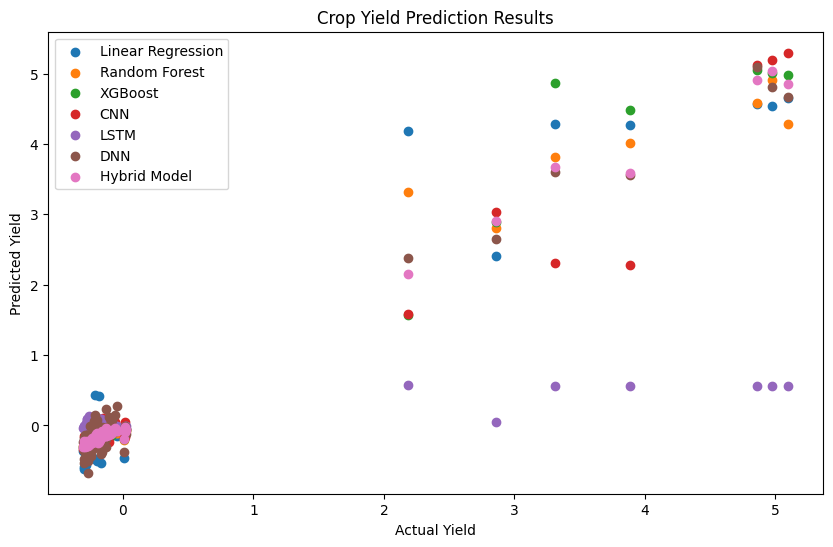

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_preds, label='Linear Regression', marker='o')
plt.scatter(y_test, rf_preds, label='Random Forest', marker='o')
plt.scatter(y_test, xgb_preds, label='XGBoost', marker='o')
plt.scatter(y_test, cnn_preds, label='CNN', marker='o')
plt.scatter(y_test, lstm_preds, label='LSTM', marker='o')
plt.scatter(y_test, dnn_preds, label='DNN', marker='o')
plt.scatter(y_test, hybrid_preds, label='Hybrid Model', marker='o')

plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Crop Yield Prediction Results')
plt.legend()
plt.show()

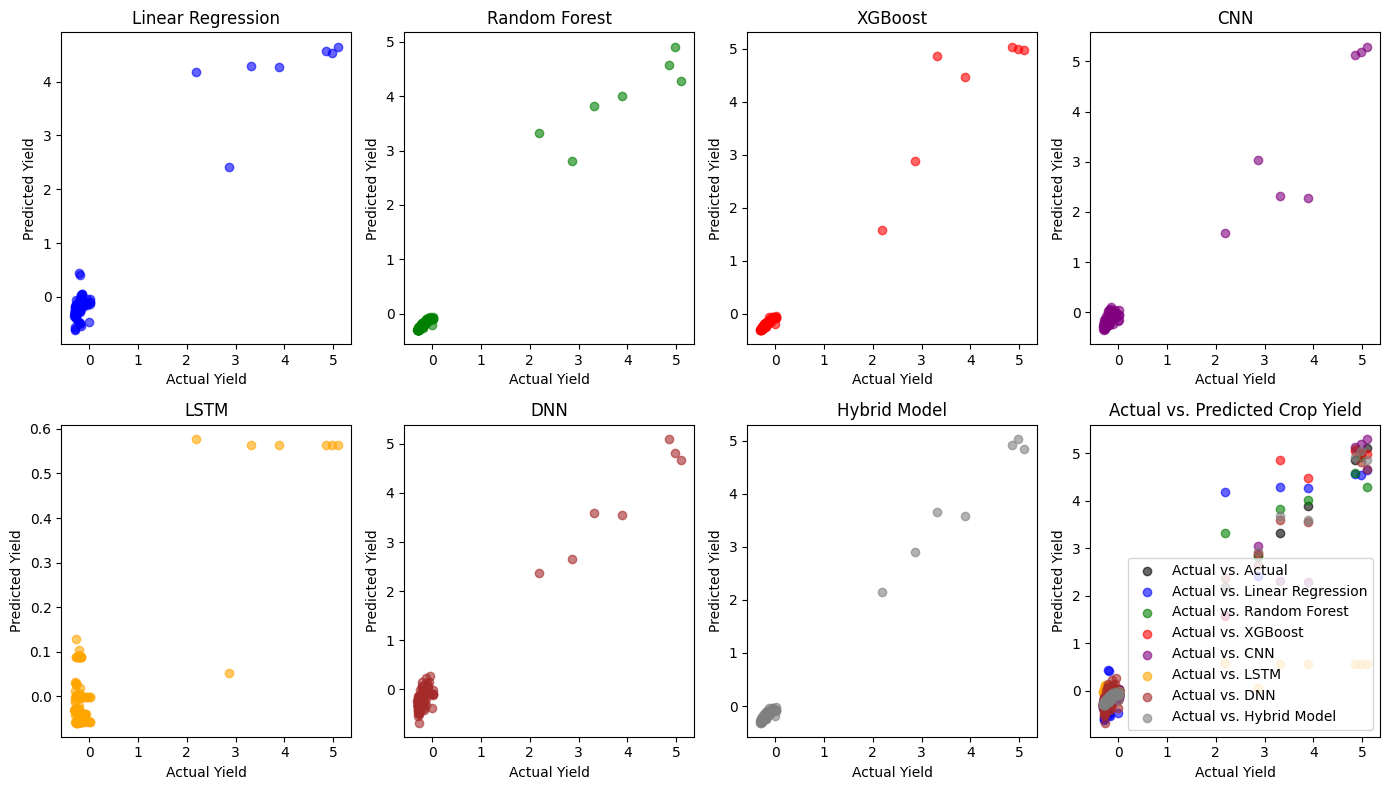

In [19]:
# Visualize Results
plt.figure(figsize=(14, 8))

# Linear Regression
plt.subplot(2, 4, 1)
plt.scatter(y_test, lr_preds, color='blue', alpha=0.6)
plt.title('Linear Regression')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')

# Random Forest
plt.subplot(2, 4, 2)
plt.scatter(y_test, rf_preds, color='green', alpha=0.6)
plt.title('Random Forest')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')

# XGBoost
plt.subplot(2, 4, 3)
plt.scatter(y_test, xgb_preds, color='red', alpha=0.6)
plt.title('XGBoost')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')

# CNN
plt.subplot(2, 4, 4)
plt.scatter(y_test, cnn_preds, color='purple', alpha=0.6)
plt.title('CNN')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')

# LSTM
plt.subplot(2, 4, 5)
plt.scatter(y_test, lstm_preds, color='orange', alpha=0.6)
plt.title('LSTM')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')

# DNN
plt.subplot(2, 4, 6)
plt.scatter(y_test, dnn_preds, color='brown', alpha=0.6)
plt.title('DNN')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')

# Hybrid Model
plt.subplot(2, 4, 7)
plt.scatter(y_test, hybrid_preds, color='gray', alpha=0.6)
plt.title('Hybrid Model')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')

# Actual vs. Predicted
plt.subplot(2, 4, 8)
plt.scatter(y_test, y_test, color='black', alpha=0.6, label='Actual vs. Actual')
plt.scatter(y_test, lr_preds, color='blue', alpha=0.6, label='Actual vs. Linear Regression')
plt.scatter(y_test, rf_preds, color='green', alpha=0.6, label='Actual vs. Random Forest')
plt.scatter(y_test, xgb_preds, color='red', alpha=0.6, label='Actual vs. XGBoost')
plt.scatter(y_test, cnn_preds, color='purple', alpha=0.6, label='Actual vs. CNN')
plt.scatter(y_test, lstm_preds, color='orange', alpha=0.6, label='Actual vs. LSTM')
plt.scatter(y_test, dnn_preds, color='brown', alpha=0.6, label='Actual vs. DNN')
plt.scatter(y_test, hybrid_preds, color='gray', alpha=0.6, label='Actual vs. Hybrid Model')

plt.title('Actual vs. Predicted Crop Yield')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.legend()
plt.tight_layout()
plt.show()

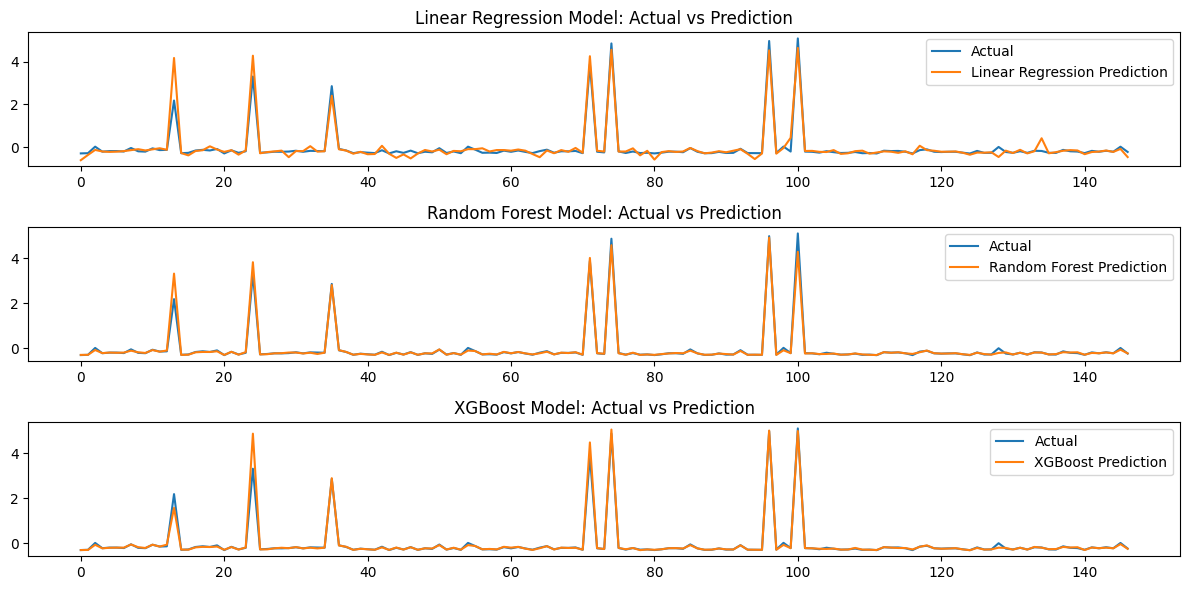

In [20]:
# Plotting Linear Regression predictions
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(y_test_scaled, label='Actual')
plt.plot(lr_preds, label='Linear Regression Prediction')
plt.title('Linear Regression Model: Actual vs Prediction')
plt.legend()

# Plotting Random Forest predictions
plt.subplot(3, 1, 2)
plt.plot(y_test_scaled, label='Actual')
plt.plot(rf_preds, label='Random Forest Prediction')
plt.title('Random Forest Model: Actual vs Prediction')
plt.legend()

# Plotting XGBoost predictions
plt.subplot(3, 1, 3)
plt.plot(y_test_scaled, label='Actual')
plt.plot(xgb_preds, label='XGBoost Prediction')
plt.title('XGBoost Model: Actual vs Prediction')
plt.legend()

plt.tight_layout()
plt.show()

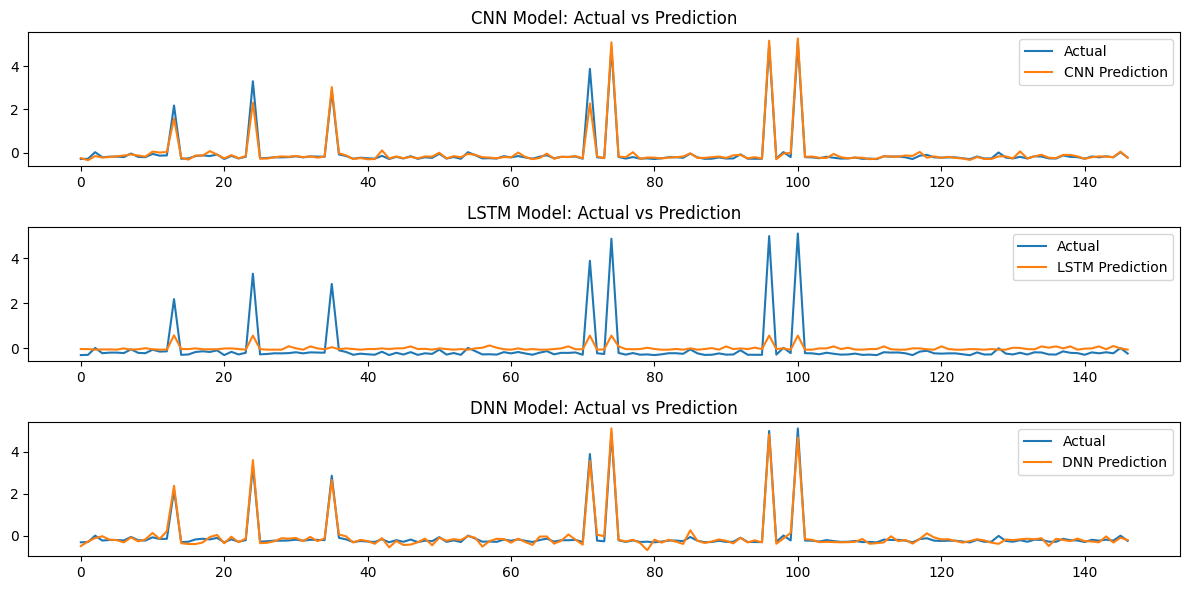

In [21]:
# Plotting CNN predictions
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(y_test_scaled, label='Actual')
plt.plot(cnn_preds, label='CNN Prediction')  # Assuming cnn_pred is a 2D array, we select the first column
plt.title('CNN Model: Actual vs Prediction')
plt.legend()

# Plotting LSTM predictions
plt.subplot(3, 1, 2)
plt.plot(y_test_scaled, label='Actual')
plt.plot(lstm_preds, label='LSTM Prediction')  # Assuming lstm_pred is a 2D array, we select the first column
plt.title('LSTM Model: Actual vs Prediction')
plt.legend()

# Plotting DNN predictions
plt.subplot(3, 1, 3)
plt.plot(y_test_scaled, label='Actual')
plt.plot(dnn_preds, label='DNN Prediction')
plt.title('DNN Model: Actual vs Prediction')
plt.legend()

plt.tight_layout()
plt.show()

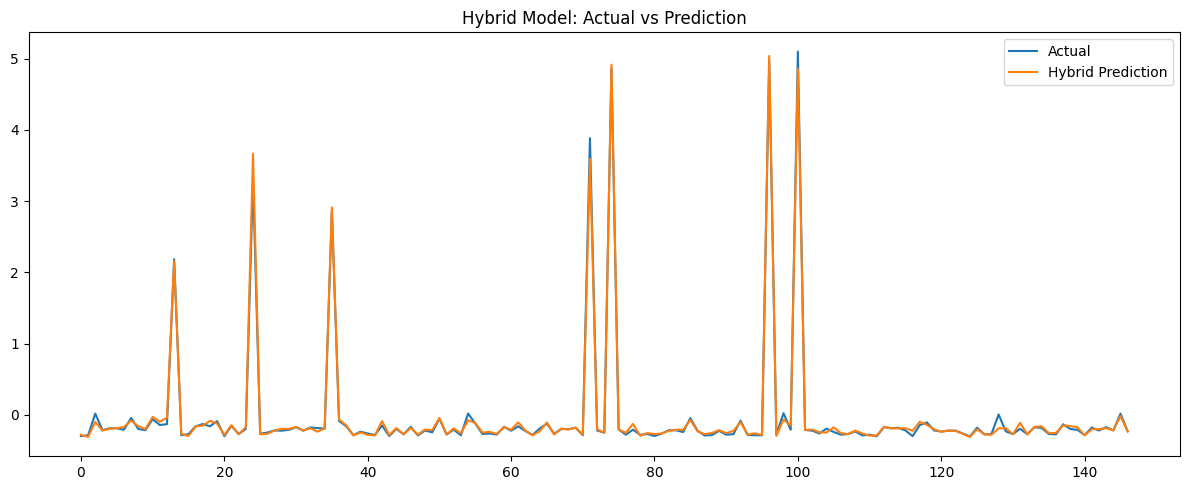

In [22]:
# Plotting Hybrid predictions
plt.figure(figsize=(12, 5))
plt.plot(y_test_scaled, label='Actual')
plt.plot(hybrid_preds, label='Hybrid Prediction')
plt.title('Hybrid Model: Actual vs Prediction')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
# Flatten the arrays to ensure they are 1-dimensional
lr_preds_flat = lr_preds.flatten()
rf_preds_flat = rf_preds.flatten()
xgb_preds_flat = xgb_preds.flatten()
cnn_preds_flat = cnn_preds.flatten()
lstm_preds_flat = lstm_preds.flatten()
dnn_preds_flat = dnn_preds.flatten()
hybrid_preds_flat = hybrid_preds.flatten()

In [24]:
print("Shapes of prediction arrays:")
print("Linear Regression:", lr_preds_flat.shape)
print("Random Forest:", rf_preds_flat.shape)
print("XGBoost:", xgb_preds_flat.shape)
print("CNN:", cnn_preds_flat.shape)
print("LSTM:", lstm_preds_flat.shape)
print("DNN:", dnn_preds_flat.shape)
print("Hybrid Model:", hybrid_preds_flat.shape)


Shapes of prediction arrays:
Linear Regression: (147,)
Random Forest: (147,)
XGBoost: (147,)
CNN: (147,)
LSTM: (147,)
DNN: (147,)
Hybrid Model: (147,)


In [25]:
print("Shape of y_test:", y_test.shape)

Shape of y_test: (147, 1)


In [26]:
# Flatten y_test to make it 1-dimensional
y_test_flat = y_test.flatten()

# Creating a DataFrame with model predictions and evaluation metrics
df_results = pd.DataFrame({
    'Actual': y_test_flat,
    'Linear Regression': lr_preds_flat,
    'Random Forest': rf_preds_flat,
    'XGBoost': xgb_preds_flat,
    'CNN': cnn_preds_flat,
    'LSTM': lstm_preds_flat,
    'DNN': dnn_preds_flat,
    'Hybrid Model': hybrid_preds_flat
})


In [27]:
# Adding evaluation metrics to the DataFrame
df_metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'CNN', 'LSTM', 'DNN', 'Hybrid Model'],
    'RMSE': [lr_rmse, rf_rmse, xgb_rmse, cnn_rmse, lstm_rmse, dnn_rmse, hybrid_rmse],
    'MAE': [lr_mae, rf_mae, xgb_mae, cnn_mae, lstm_mae, dnn_mae, hybrid_mae],
    'MSE': [lr_mse, rf_mse, xgb_mse, cnn_mse, lstm_mse, dnn_mse, hybrid_mse],
    'R^2': [lr_squared, rf_squared, xgb_squared, cnn_squared, lstm_squared, dnn_squared, hybrid_squared]
})

df_metrics.set_index('Model', inplace=True)

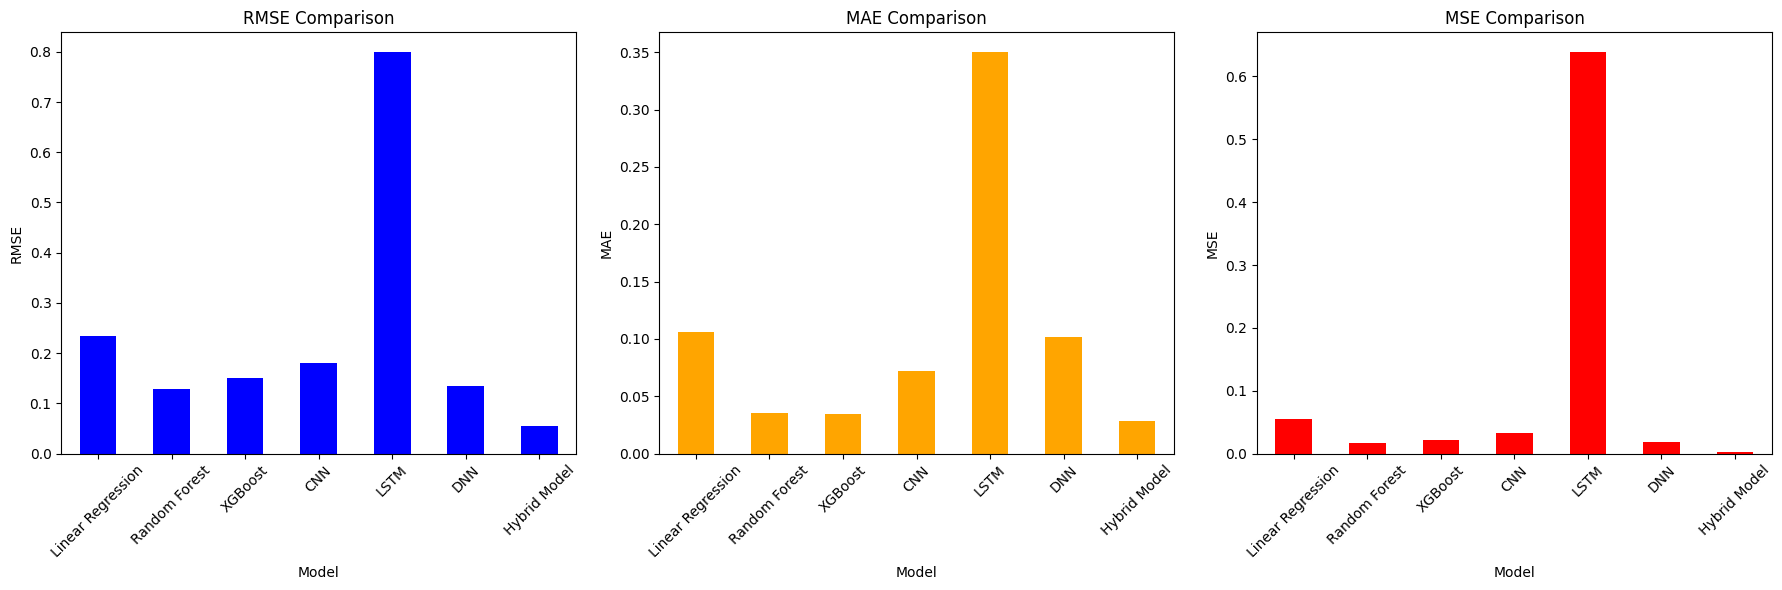

In [28]:
# Plotting evaluation metrics
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# RMSE Comparison
df_metrics['RMSE'].plot(kind='bar', color='blue', ax=axs[0], rot=45)
axs[0].set_title('RMSE Comparison')
axs[0].set_ylabel('RMSE')

# MAE Comparison
df_metrics['MAE'].plot(kind='bar', color='orange', ax=axs[1], rot=45)
axs[1].set_title('MAE Comparison')
axs[1].set_ylabel('MAE')

# MSE Comparison
df_metrics['MSE'].plot(kind='bar', color='red', ax=axs[2], rot=45)
axs[2].set_title('MSE Comparison')
axs[2].set_ylabel('MSE')

plt.tight_layout()
plt.show()

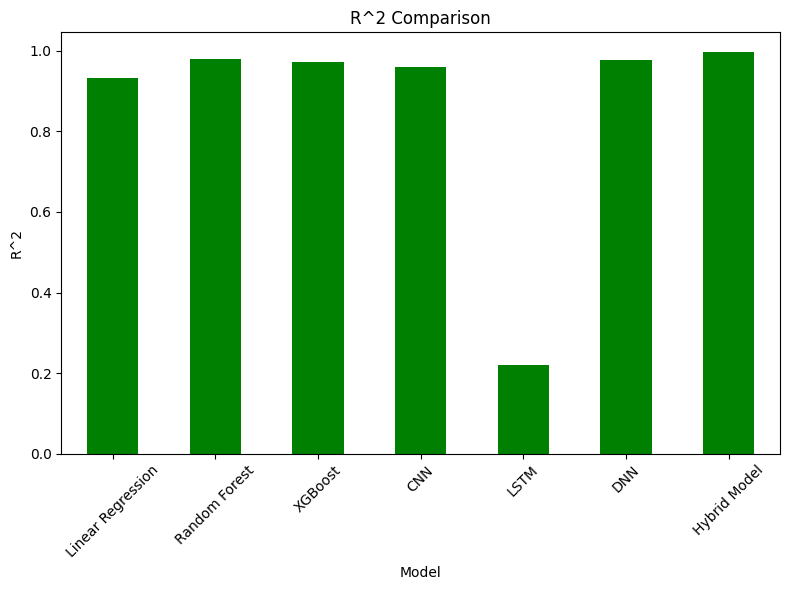

In [29]:
# Plotting R^2
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

# R^2 Comparison
df_metrics['R^2'].plot(kind='bar', color='green', ax=axs, rot=45)
axs.set_title('R^2 Comparison')
axs.set_ylabel('R^2')

plt.tight_layout()
plt.show()

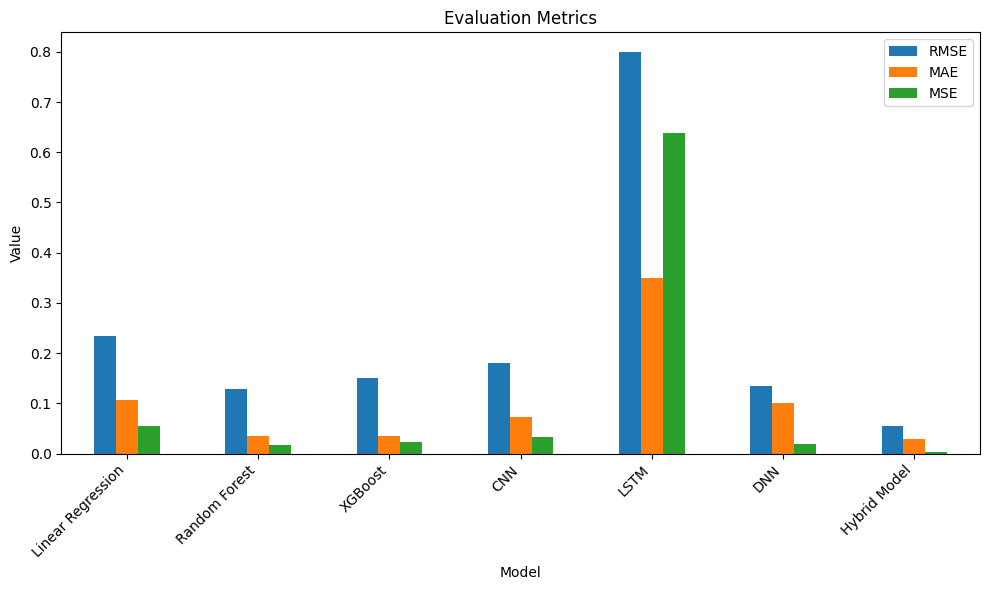

In [30]:
# Plotting only the bar plot for evaluation metrics
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# Bar plot for evaluation metrics
df_metrics.plot(kind='bar', y=['RMSE', 'MAE', 'MSE'], ax=axes)
axes.set_title('Evaluation Metrics')
axes.set_ylabel('Value')
axes.set_xticklabels(df_metrics.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

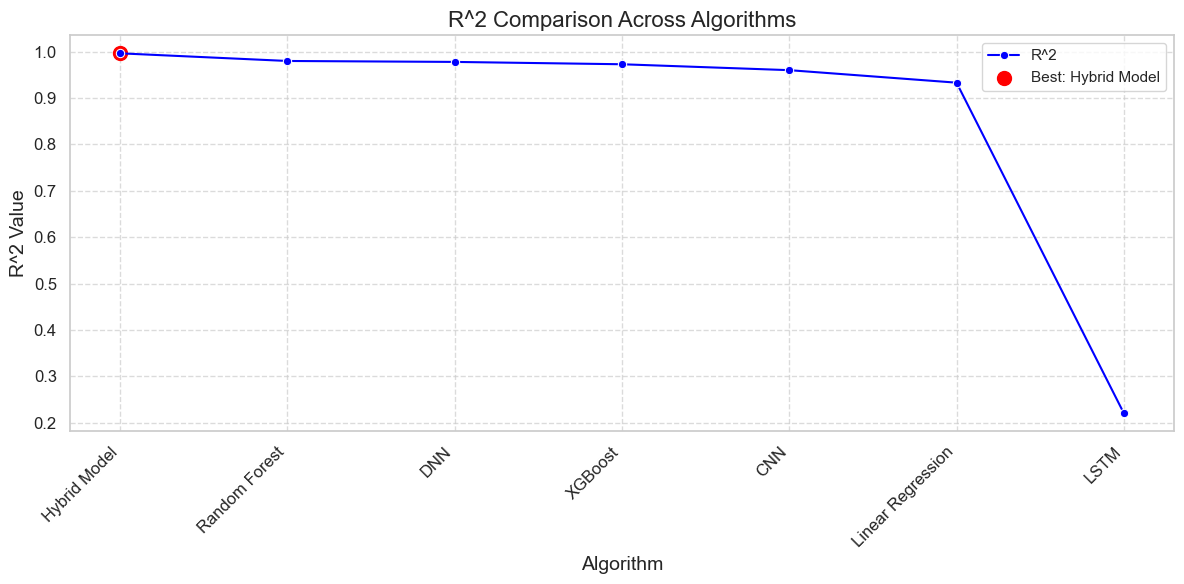

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Sort the DataFrame by R^2 values
df_metrics_sorted = df_metrics.sort_values(by='R^2', ascending=False)

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_metrics_sorted.index, y=df_metrics_sorted['R^2'], marker='o', color='blue', label='R^2')

# Highlight the best algorithm with a marker
best_algorithm = df_metrics_sorted.index[0]
best_r2 = df_metrics_sorted.loc[best_algorithm, 'R^2']
plt.scatter([best_algorithm], [best_r2], color='red', marker='o', label=f'Best: {best_algorithm}', s=100)

# Customize the plot
plt.title('R^2 Comparison Across Algorithms', fontsize=16)
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('R^2 Value', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\vansi\AppData\Local\Temp\ipykernel_21804\375110370.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r2_values_sorted = r2_values_percentage[sorted_indices]


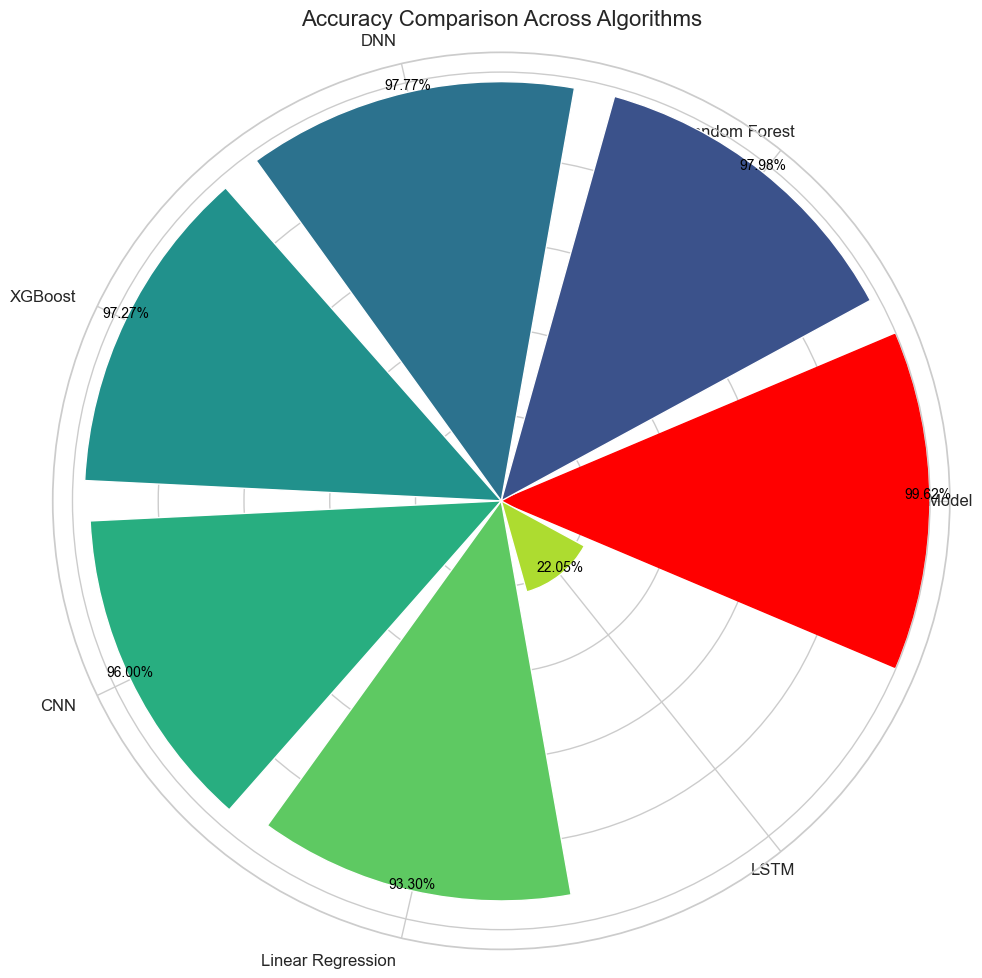

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create some example data
algorithms = df_metrics.index
r2_values = df_metrics['R^2']

# Convert R^2 values to percentage
r2_values_percentage = r2_values * 100

# Sort the data
sorted_indices = np.argsort(r2_values_percentage)[::-1]
algorithms_sorted = algorithms[sorted_indices]
r2_values_sorted = r2_values_percentage[sorted_indices]

# Create a polar plot
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Plot the data
theta = np.linspace(0, 2*np.pi, len(algorithms_sorted), endpoint=False)
bars = ax.bar(theta, r2_values_sorted, color=sns.color_palette("viridis", len(algorithms_sorted)))

# Highlight the best algorithm
best_algorithm_index = np.argmax(r2_values_sorted)
bars[best_algorithm_index].set_color('red')

# Customize the plot
ax.set_xticks(theta)
ax.set_xticklabels(algorithms_sorted, fontsize=12, ha='right', wrap=True)  # wrap=True for automatic line wrapping
ax.set_yticklabels([])  # Hide radial labels
ax.set_title('Accuracy Comparison Across Algorithms', fontsize=16)

# Display the values on top of the bars
for bar, label in zip(bars, r2_values_sorted):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{label:.2f}%',
            ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()  # Ensure labels are not cut off
plt.show()

C:\Users\vansi\AppData\Local\Temp\ipykernel_21804\2781149302.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='R^2', y=df_sorted.index, data=df_sorted, palette='viridis')


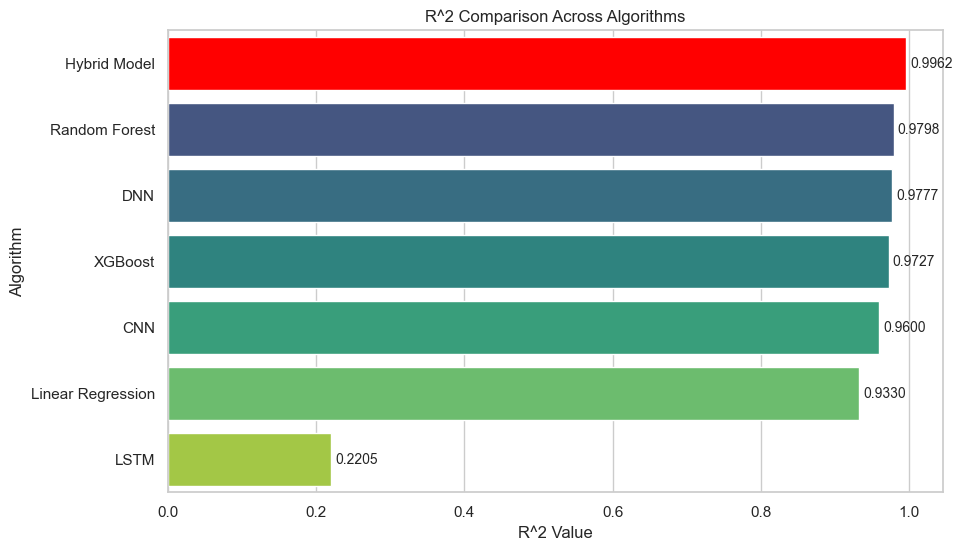

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the data by R^2 values
df_sorted = df_metrics.sort_values(by='R^2', ascending=False)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='R^2', y=df_sorted.index, data=df_sorted, palette='viridis')

# Highlight the best algorithm
best_algorithm = df_sorted.index[0]
best_index = df_sorted.index.get_loc(best_algorithm)
bars.patches[best_index].set_facecolor('red')

# Customize the plot
plt.title('R^2 Comparison Across Algorithms')
plt.xlabel('R^2 Value')
plt.ylabel('Algorithm')

# Display R^2 values next to the bars
for index, value in enumerate(df_sorted['R^2']):
    plt.text(value + 0.005, index, f'{value:.4f}', va='center', fontsize=10)

plt.show()

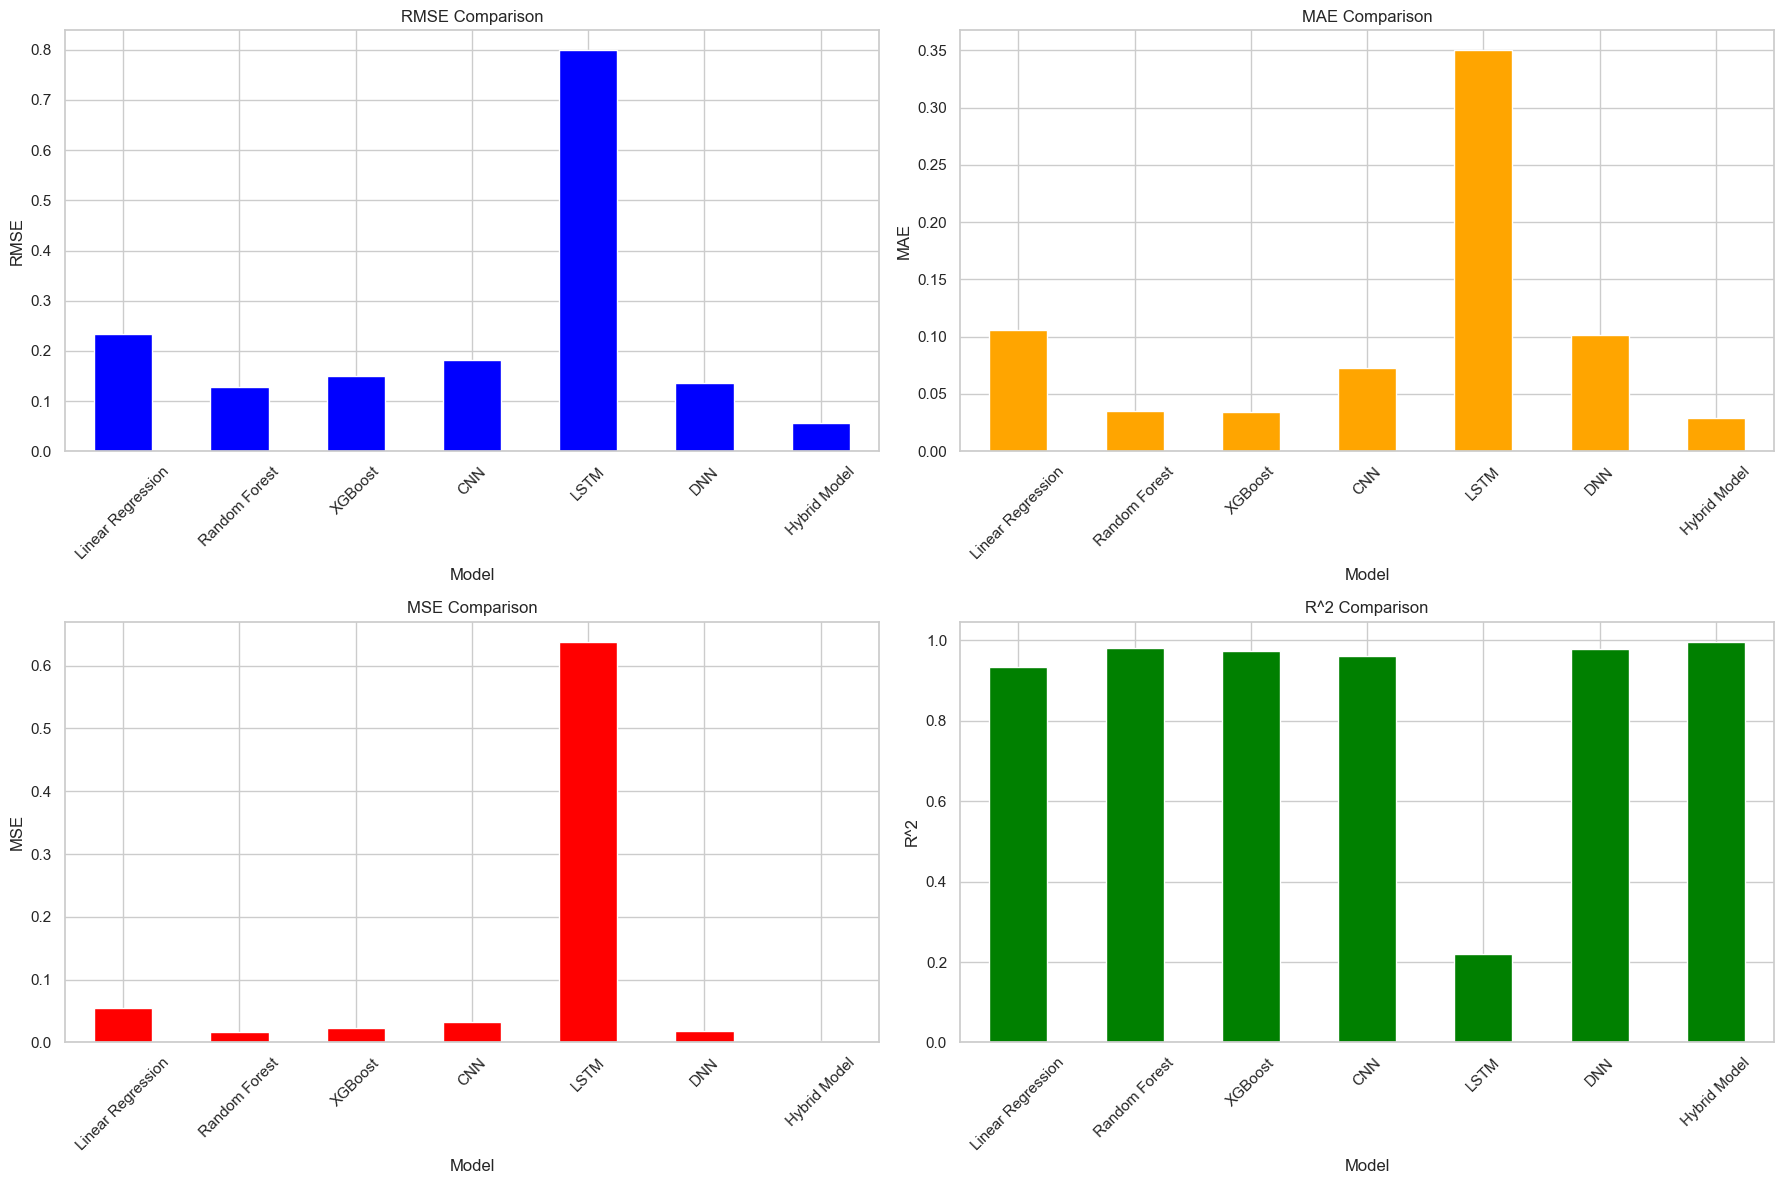

In [34]:
# Plotting evaluation metrics
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# RMSE Comparison
df_metrics['RMSE'].plot(kind='bar', color='blue', ax=axs[0, 0], rot=45)
axs[0, 0].set_title('RMSE Comparison')
axs[0, 0].set_ylabel('RMSE')

# MAE Comparison
df_metrics['MAE'].plot(kind='bar', color='orange', ax=axs[0, 1], rot=45)
axs[0, 1].set_title('MAE Comparison')
axs[0, 1].set_ylabel('MAE')

# MSE Comparison
df_metrics['MSE'].plot(kind='bar', color='red', ax=axs[1, 0], rot=45)
axs[1, 0].set_title('MSE Comparison')
axs[1, 0].set_ylabel('MSE')

# R^2 Comparison
df_metrics['R^2'].plot(kind='bar', color='green', ax=axs[1, 1], rot=45)
axs[1, 1].set_title('R^2 Comparison')
axs[1, 1].set_ylabel('R^2')

plt.tight_layout()
plt.show()

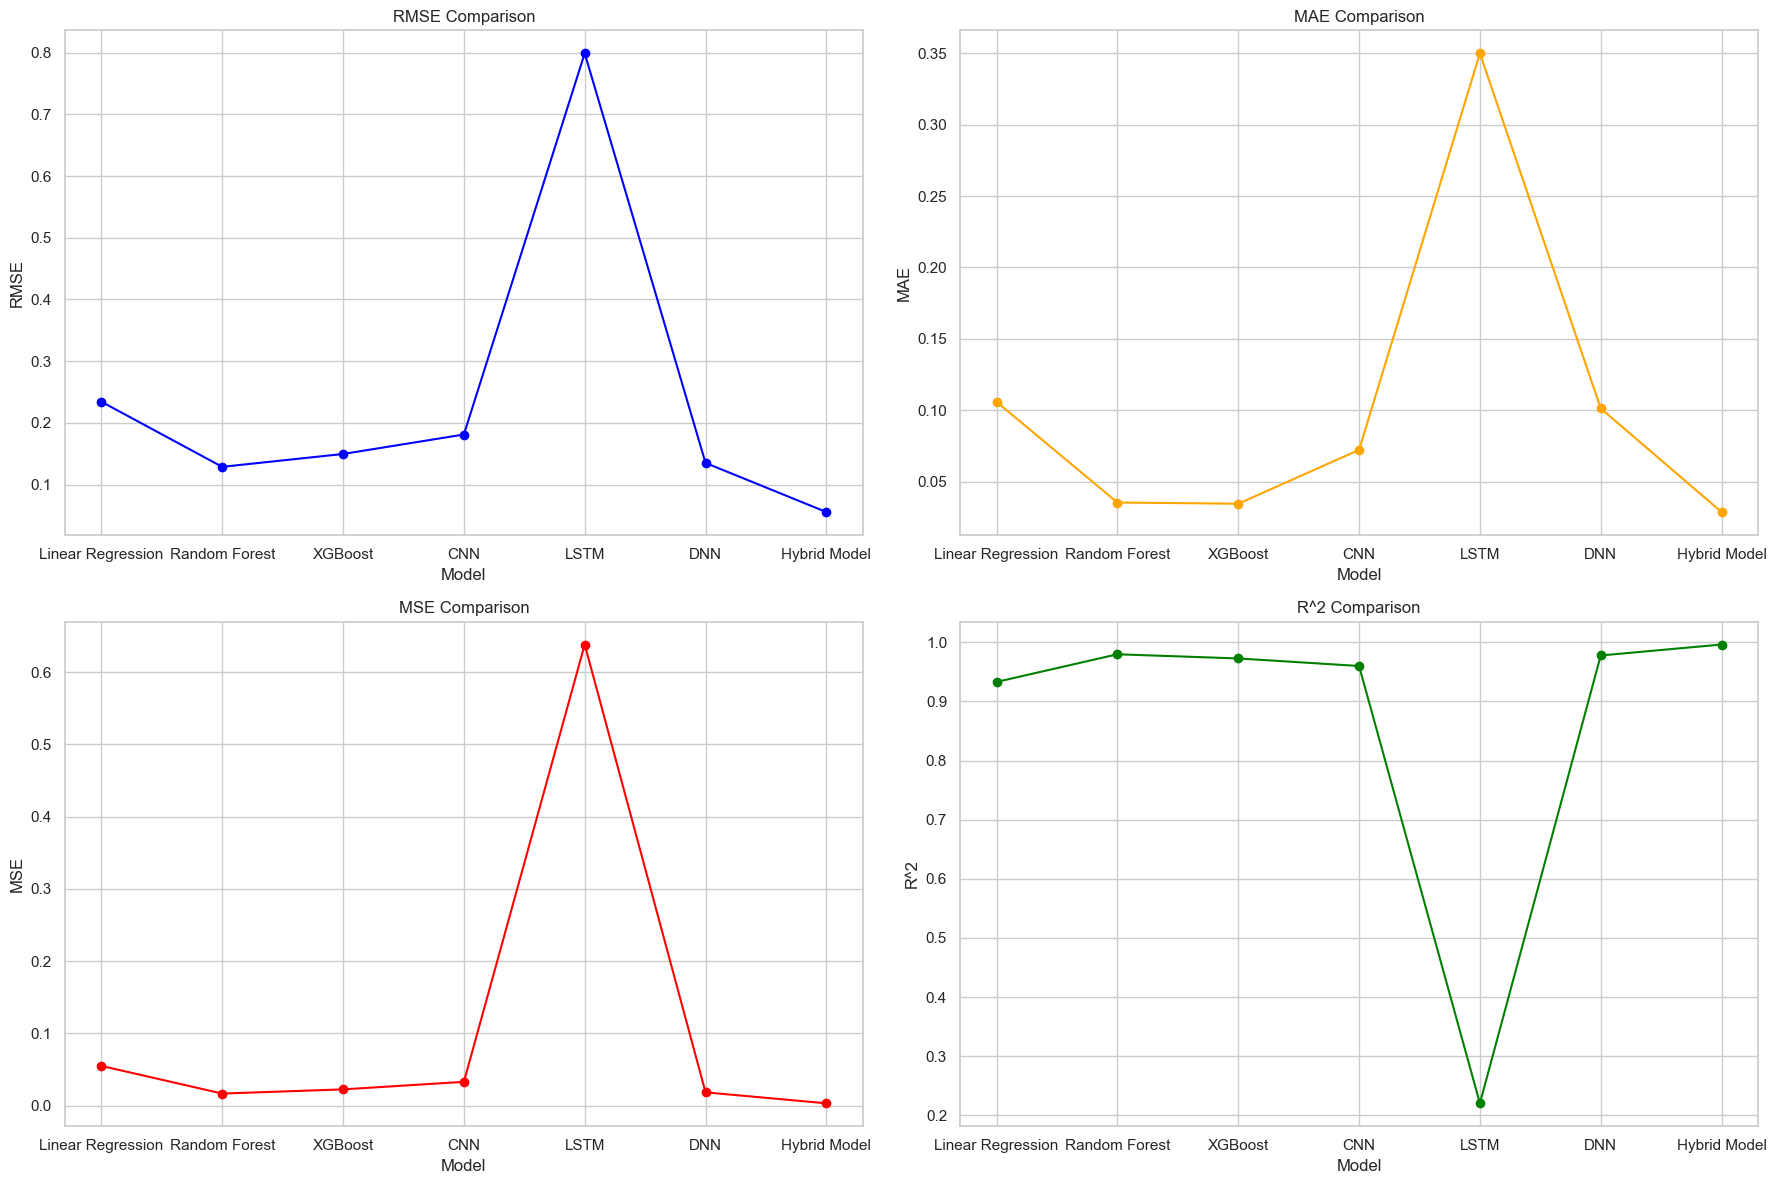

In [35]:
# Plotting evaluation metrics as line graphs
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# RMSE Comparison
df_metrics['RMSE'].plot(kind='line', marker='o', color='blue', ax=axs[0, 0])
axs[0, 0].set_title('RMSE Comparison')
axs[0, 0].set_ylabel('RMSE')

# MAE Comparison
df_metrics['MAE'].plot(kind='line', marker='o', color='orange', ax=axs[0, 1])
axs[0, 1].set_title('MAE Comparison')
axs[0, 1].set_ylabel('MAE')

# MSE Comparison
df_metrics['MSE'].plot(kind='line', marker='o', color='red', ax=axs[1, 0])
axs[1, 0].set_title('MSE Comparison')
axs[1, 0].set_ylabel('MSE')

# R^2 Comparison
df_metrics['R^2'].plot(kind='line', marker='o', color='green', ax=axs[1, 1])
axs[1, 1].set_title('R^2 Comparison')
axs[1, 1].set_ylabel('R^2')

plt.tight_layout()
plt.show()

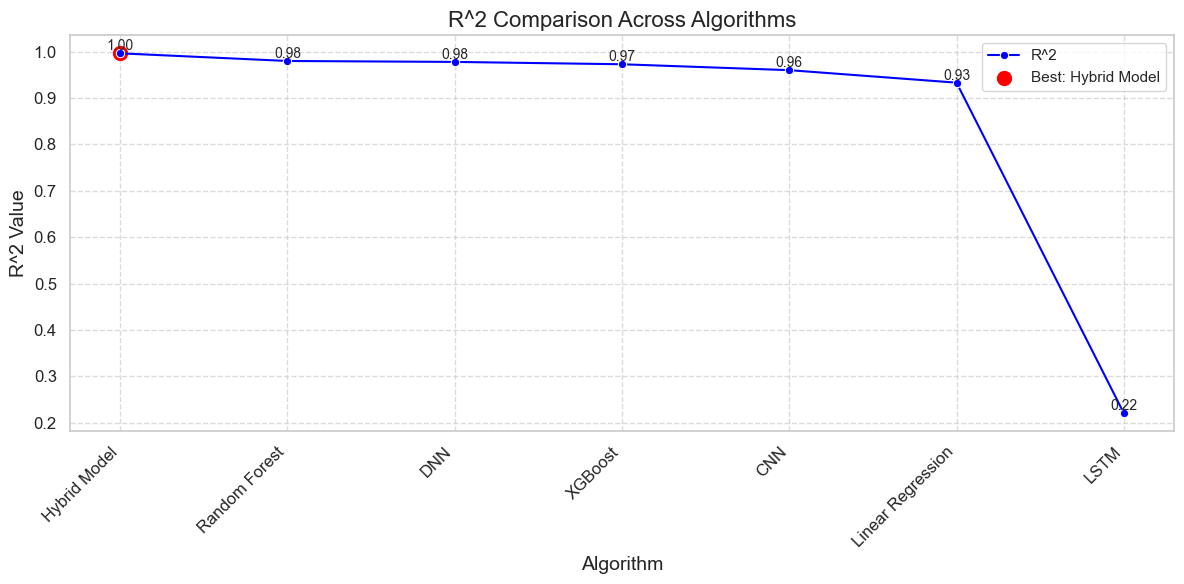

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Sort the DataFrame by R^2 values
df_metrics_sorted = df_metrics.sort_values(by='R^2', ascending=False)

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_metrics_sorted.index, y=df_metrics_sorted['R^2'], marker='o', color='blue', label='R^2')

# Highlight the best algorithm with a marker
best_algorithm = df_metrics_sorted.index[0]
best_r2 = df_metrics_sorted.loc[best_algorithm, 'R^2']
plt.scatter([best_algorithm], [best_r2], color='red', marker='o', label=f'Best: {best_algorithm}', s=100)

# Add data labels
for index, value in zip(df_metrics_sorted.index, df_metrics_sorted['R^2']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('R^2 Comparison Across Algorithms', fontsize=16)
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('R^2 Value', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


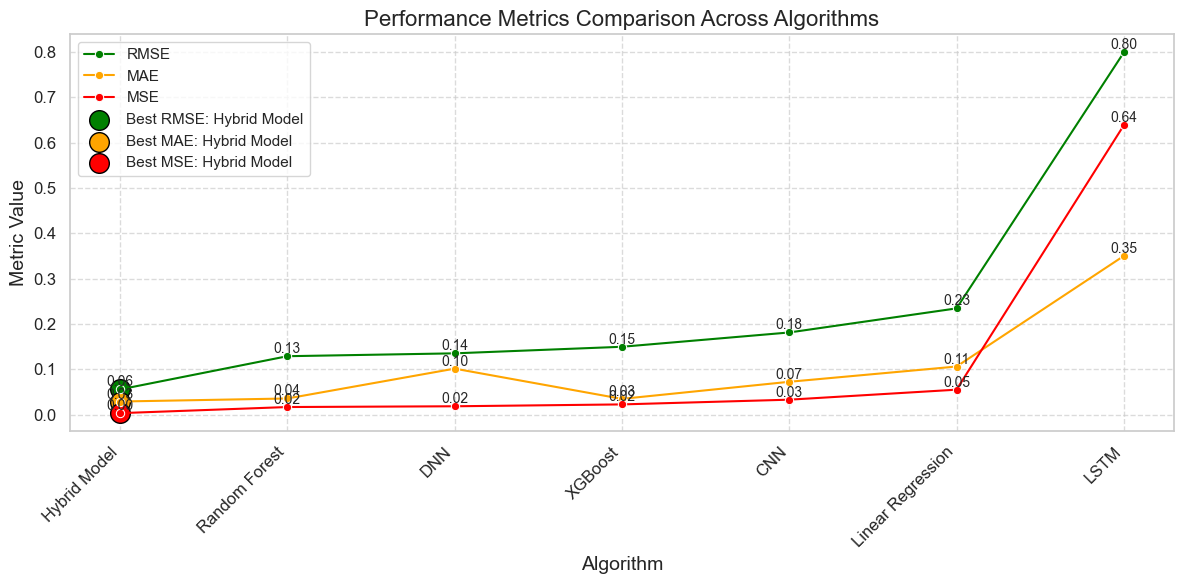

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Sort the DataFrame by RMSE values
df_metrics_sorted = df_metrics.sort_values(by='RMSE', ascending=True)

# Create a line plot for each metric
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_metrics_sorted.index, y=df_metrics_sorted['RMSE'], marker='o', color='green', label='RMSE')
sns.lineplot(x=df_metrics_sorted.index, y=df_metrics_sorted['MAE'], marker='o', color='orange', label='MAE')
sns.lineplot(x=df_metrics_sorted.index, y=df_metrics_sorted['MSE'], marker='o', color='red', label='MSE')

# Highlight the best algorithm with markers
best_algorithm = df_metrics_sorted.index[0]
best_rmse = df_metrics_sorted.loc[best_algorithm, 'RMSE']
best_mae = df_metrics_sorted.loc[best_algorithm, 'MAE']
best_mse = df_metrics_sorted.loc[best_algorithm, 'MSE']

plt.scatter([best_algorithm], [best_rmse], color='green', marker='o', label=f'Best RMSE: {best_algorithm}', s=200, edgecolor='black')
plt.scatter([best_algorithm], [best_mae], color='orange', marker='o', label=f'Best MAE: {best_algorithm}', s=200, edgecolor='black')
plt.scatter([best_algorithm], [best_mse], color='red', marker='o', label=f'Best MSE: {best_algorithm}', s=200, edgecolor='black')

# Add data labels
for index, rmse, mae, mse in zip(df_metrics_sorted.index, df_metrics_sorted['RMSE'],
                                  df_metrics_sorted['MAE'], df_metrics_sorted['MSE']):
    plt.text(index, rmse, f'{rmse:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(index, mae, f'{mae:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(index, mse, f'{mse:.2f}', ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Performance Metrics Comparison Across Algorithms', fontsize=16)
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('Metric Value', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

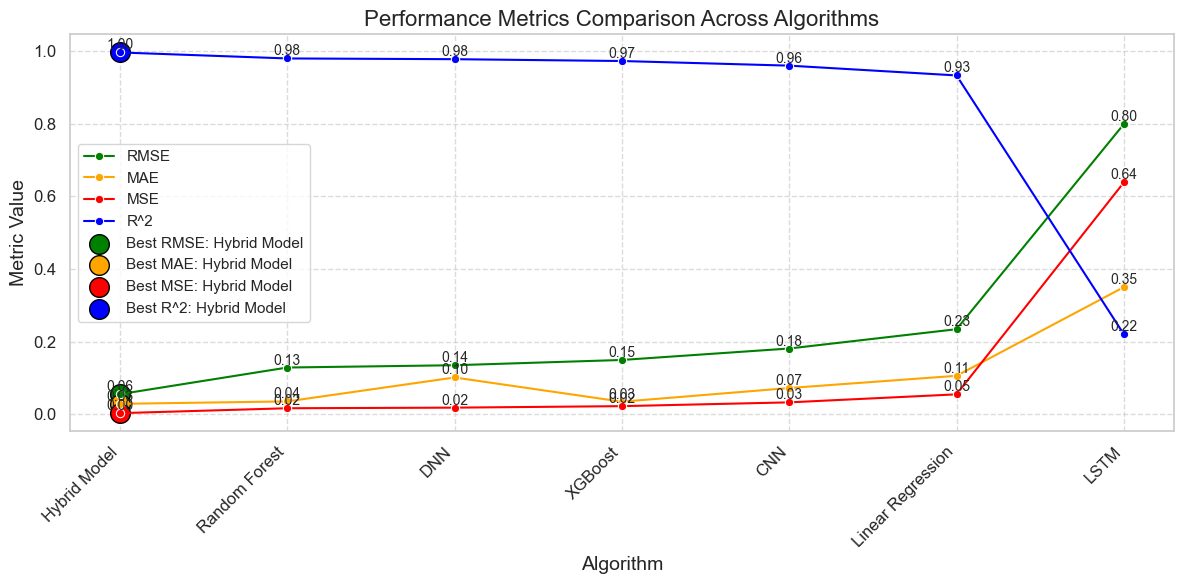

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Sort the DataFrame by RMSE values
df_metrics_sorted = df_metrics.sort_values(by='RMSE', ascending=True)

# Create a line plot for each metric
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_metrics_sorted.index, y=df_metrics_sorted['RMSE'], marker='o', color='green', label='RMSE')
sns.lineplot(x=df_metrics_sorted.index, y=df_metrics_sorted['MAE'], marker='o', color='orange', label='MAE')
sns.lineplot(x=df_metrics_sorted.index, y=df_metrics_sorted['MSE'], marker='o', color='red', label='MSE')
sns.lineplot(x=df_metrics_sorted.index, y=df_metrics_sorted['R^2'], marker='o', color='blue', label='R^2')

# Highlight the best algorithm with markers
best_algorithm = df_metrics_sorted.index[0]
best_rmse = df_metrics_sorted.loc[best_algorithm, 'RMSE']
best_mae = df_metrics_sorted.loc[best_algorithm, 'MAE']
best_mse = df_metrics_sorted.loc[best_algorithm, 'MSE']
best_r2 = df_metrics_sorted.loc[best_algorithm, 'R^2']

plt.scatter([best_algorithm], [best_rmse], color='green', marker='o', label=f'Best RMSE: {best_algorithm}', s=200, edgecolor='black')
plt.scatter([best_algorithm], [best_mae], color='orange', marker='o', label=f'Best MAE: {best_algorithm}', s=200, edgecolor='black')
plt.scatter([best_algorithm], [best_mse], color='red', marker='o', label=f'Best MSE: {best_algorithm}', s=200, edgecolor='black')
plt.scatter([best_algorithm], [best_r2], color='blue', marker='o', label=f'Best R^2: {best_algorithm}', s=200, edgecolor='black')

# Add data labels
for index, rmse, mae, mse, r2 in zip(df_metrics_sorted.index, df_metrics_sorted['RMSE'],
                                  df_metrics_sorted['MAE'], df_metrics_sorted['MSE'], df_metrics_sorted['R^2']):
    plt.text(index, rmse, f'{rmse:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(index, mae, f'{mae:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(index, mse, f'{mse:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(index, r2, f'{r2:.2f}', ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Performance Metrics Comparison Across Algorithms', fontsize=16)
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('Metric Value', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


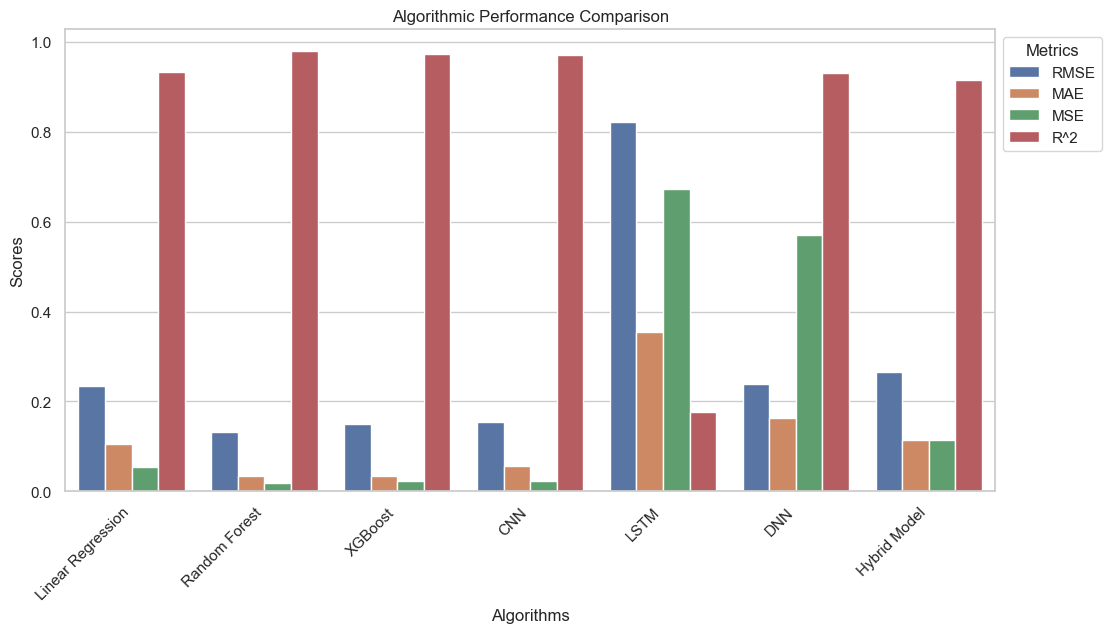

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Create a DataFrame with your data
data = {
    'Algorithm': ['Linear Regression', 'Random Forest', 'XGBoost', 'CNN', 'LSTM', 'DNN', 'Hybrid Model'],
    'RMSE': [0.2342, 0.1328, 0.1495, 0.1535, 0.8207, 0.2389, 0.2652],
    'MAE': [0.1059, 0.0341, 0.0345, 0.0568, 0.3555, 0.1630, 0.1153],
    'MSE': [0.0548, 0.0176, 0.0223, 0.0235, 0.6735, 0.5711, 0.1153],
    'R^2': [0.9329, 0.9784, 0.9726, 0.9711, 0.1773, 0.9302, 0.9140]
}

df = pd.DataFrame(data)

# Set the style
sns.set(style="whitegrid")

# Melt the DataFrame for easier plotting
df_melted = pd.melt(df, id_vars='Algorithm', var_name='Metric', value_name='Score')

# Create Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Algorithm', y='Score', hue='Metric', data=df_melted)
plt.title('Algorithmic Performance Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.legend(title='Metrics', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.show()


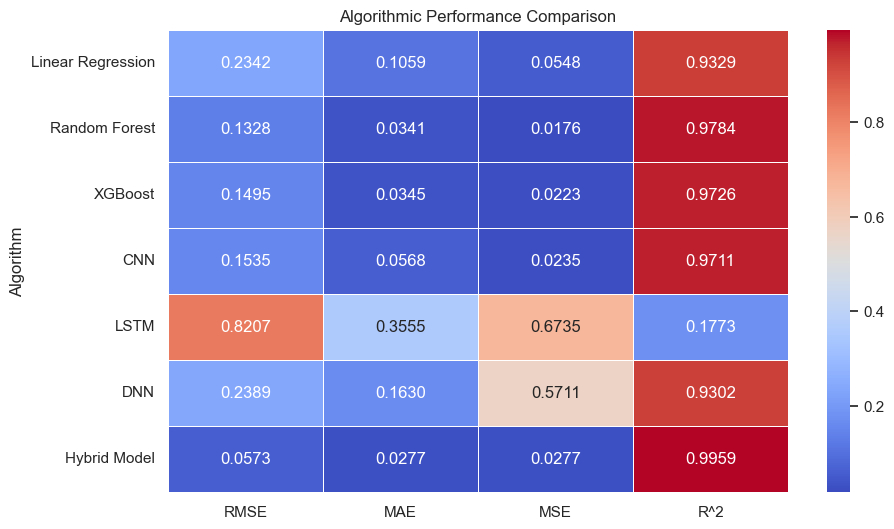

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Create a DataFrame with your data
data = {
    'Algorithm': ['Linear Regression', 'Random Forest', 'XGBoost', 'CNN', 'LSTM', 'DNN', 'Hybrid Model'],
    'RMSE': [0.2342, 0.1328, 0.1495, 0.1535, 0.8207, 0.2389, 0.0573],
    'MAE': [0.1059, 0.0341, 0.0345, 0.0568, 0.3555, 0.1630, 0.0277],
    'MSE': [0.0548, 0.0176, 0.0223, 0.0235, 0.6735, 0.5711, 0.0277],
    'R^2': [0.9329, 0.9784, 0.9726, 0.9711, 0.1773, 0.9302, 0.9959]
}

df = pd.DataFrame(data)

# Set the style
sns.set(style="whitegrid")

# Create a heatmap for better visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df.set_index('Algorithm'), annot=True, cmap='coolwarm', fmt='.4f', linewidths=.5)
plt.title('Algorithmic Performance Comparison')
plt.show()

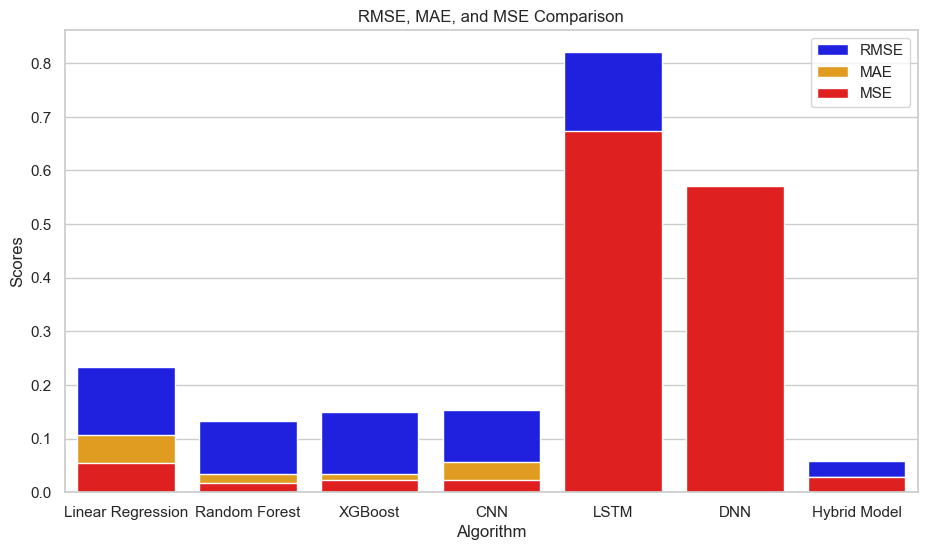

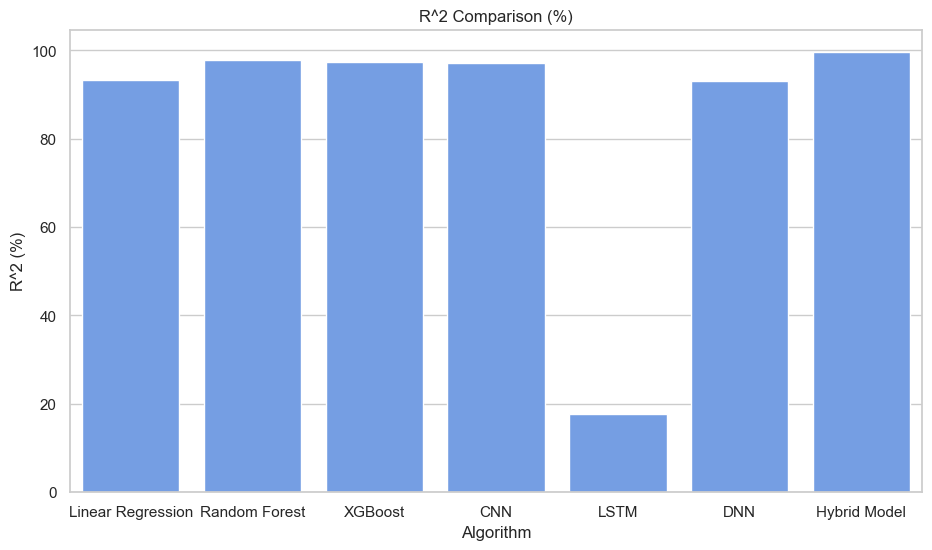

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Create a DataFrame with your data
data = {
    'Algorithm': ['Linear Regression', 'Random Forest', 'XGBoost', 'CNN', 'LSTM', 'DNN', 'Hybrid Model'],
    'RMSE': [0.2342, 0.1328, 0.1495, 0.1535, 0.8207, 0.2389, 0.0573],
    'MAE': [0.1059, 0.0341, 0.0345, 0.0568, 0.3555, 0.1630, 0.0277],
    'MSE': [0.0548, 0.0176, 0.0223, 0.0235, 0.6735, 0.5711, 0.0277],
    'R^2': [93.29, 97.84, 97.26, 97.11, 17.73, 93.02, 99.59]
}

df = pd.DataFrame(data)

# Set the style
sns.set(style="whitegrid")

# Plotting RMSE, MAE, and MSE
plt.figure(figsize=(11, 6))
sns.barplot(x='Algorithm', y='RMSE', data=df, color='blue', label='RMSE')
sns.barplot(x='Algorithm', y='MAE', data=df, color='orange', label='MAE')
sns.barplot(x='Algorithm', y='MSE', data=df, color='red', label='MSE')

plt.title('RMSE, MAE, and MSE Comparison')
plt.ylabel('Scores')
plt.legend()
plt.show()

# Plotting R^2 (%wise)
plt.figure(figsize=(11, 6))
sns.barplot(x='Algorithm', y='R^2', data=df, color='#6399F5')
plt.title('R^2 Comparison (%)')
plt.ylabel('R^2 (%)')
plt.show()